In [1]:
import numpy as np
import tensorflow as tf

In [2]:
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt


In [5]:
(X_train,y_train),(X_test,y_test)=datasets.cifar10.load_data()

In [4]:
X_train.shape

(50000, 32, 32, 3)

In [6]:
X_test.shape

(10000, 32, 32, 3)

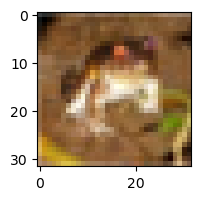

In [10]:
plt.figure(figsize=(15,2))
plt.imshow(X_train[0])

In [11]:
y_train[0]

array([6], dtype=uint8)

In [14]:
import pickle

In [16]:
labels=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [18]:
y_train=y_train.reshape(-1,)

In [20]:
labels[y_train[7]]

'horse'

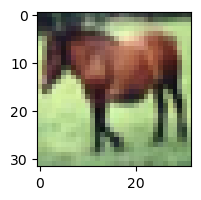

In [26]:
plt.figure(figsize=(15,2))
plt.imshow(X_train[7])

In [25]:
X_train=X_train/255
X_test=X_test/255

In [61]:
cnn=models.Sequential([
    layers.Conv2D(filters=32,kernel_size=(3,3),activation='LeakyReLU',input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(filters=64,kernel_size=(3,3),activation='LeakyReLU'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(64,activation='LeakyReLU'),
    layers.Dense(10,activation='softmax')
])

In [63]:
cnn.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [64]:
cnn.fit(X_train,y_train,epochs=10)

Epoch 1/10
1563/1563 [==============================] - 19s 12ms/step - loss: 1.3533 - accuracy: 0.5187
Epoch 2/10
1563/1563 [==============================] - 18s 12ms/step - loss: 1.0196 - accuracy: 0.6442
Epoch 3/10
1563/1563 [==============================] - 18s 12ms/step - loss: 0.8934 - accuracy: 0.6872
Epoch 4/10
1563/1563 [==============================] - 18s 12ms/step - loss: 0.8001 - accuracy: 0.7213
Epoch 5/10
1563/1563 [==============================] - 18s 12ms/step - loss: 0.7273 - accuracy: 0.7475
Epoch 6/10
1563/1563 [==============================] - 18s 12ms/step - loss: 0.6664 - accuracy: 0.7689
Epoch 7/10
1563/1563 [==============================] - 18s 12ms/step - loss: 0.6133 - accuracy: 0.7849
Epoch 8/10
1563/1563 [==============================] - 18s 12ms/step - loss: 0.5658 - accuracy: 0.8030
Epoch 9/10
1563/1563 [==============================] - 18s 12ms/step - loss: 0.5274 - accuracy: 0.8155
Epoch 10/10
1563/1563 [==============================] - 18s 12m

In [65]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 2s 4ms/step - loss: 0.9958 - accuracy: 0.6999


[0.9957500100135803, 0.6998999714851379]

In [33]:
y_test=y_test.reshape(-1,)

ship


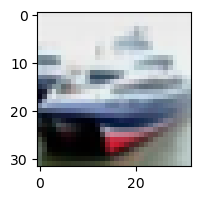

In [39]:
plt.figure(figsize=(15,2))
plt.imshow(X_test[1])
print(labels[y_test[1]])

In [44]:
y_pred=cnn.predict(X_test)

313/313 [==============================] - 1s 4ms/step


In [45]:
y_pred[:5]

array([[4.72794333e-03, 1.41740951e-03, 1.96080445e-03, 6.96067810e-01,
        8.01407034e-04, 6.49685785e-02, 9.66927223e-03, 5.88691968e-04,
        2.19703346e-01, 9.47687149e-05],
       [2.30745436e-03, 5.98628297e-02, 7.26307832e-08, 3.61404844e-08,
        3.44523343e-09, 2.03883999e-09, 4.15510506e-08, 2.17069210e-11,
        9.37644899e-01, 1.84665856e-04],
       [4.63248305e-02, 1.79985031e-01, 2.30887649e-03, 4.54435300e-04,
        4.98569352e-05, 3.06072354e-04, 9.59308090e-05, 2.23217081e-04,
        7.67145038e-01, 3.10676382e-03],
       [9.77699280e-01, 6.31189032e-04, 3.50765418e-04, 3.37027413e-05,
        3.38053971e-04, 8.25955397e-07, 1.49603889e-04, 7.91101775e-06,
        2.06896793e-02, 9.90929184e-05],
       [1.09400662e-06, 2.20196343e-05, 2.31551360e-02, 1.60588846e-02,
        4.17964846e-01, 1.48774823e-03, 5.41293323e-01, 1.68284214e-06,
        1.39754675e-05, 1.26503153e-06]], dtype=float32)

In [49]:
y_predd=[np.argmax(element) for element in y_pred]

In [51]:
y_predd[:5]

[3, 8, 8, 0, 6]

In [52]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)